This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

**Classification and regression glossary**

Classification and regression involve many specialized terms. You’ve come across
some of them in earlier examples, and you’ll see more of them in future chapters.
They have precise, machine learning–specific definitions, and you should be familiar with them:
* Sample or input—One data point that goes into your model.
* Prediction or output—What comes out of your model.
* Target—The truth. What your model should ideally have predicted, according
to an external source of data.
* Prediction error or loss value—A measure of the distance between your
model’s prediction and the target.
* Classes—A set of possible labels to choose from in a classification problem.
For example, when classifying cat and dog pictures, “dog” and “cat” are the
two classes.
* Label —A specific instance of a class annotation in a classification problem.
For instance, if picture #1234 is annotated as containing the class “dog,”
then “dog” is a label of picture #1234.
* Ground-truth or annotations—All targets for a dataset, typically collected by
humans.
* Binary classification—A classification task where each input sample should
be categorized into two exclusive categories.
* Multiclass classification—A classification task where each input sample
should be categorized into more than two categories: for instance, classifying
handwritten digits.
* Multilabel classification—A classification task where each input sample can
be assigned multiple labels. For instance, a given image may contain both a
cat and a dog and should be annotated both with the “cat” label and the
“dog” label. The number of labels per image is usually variable.
* Scalar regression—A task where the target is a continuous scalar value. Predicting house prices is a good example: the different target prices form a continuous space.
* Vector regression—A task where the target is a set of continuous values: for
example, a continuous vector. If you’re doing regression against multiple values (such as the coordinates of a bounding box in an image), then you’re
doing vector regression.
* Mini-batch or batch—A small set of samples (typically between 8 and 128)
that are processed simultaneously by the model. The number of samples is
often a power of 2, to facilitate memory allocation on GPU. When training, a
mini-batch is used to compute a single gradient-descent update applied to
the weights of the model.

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [19]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [20]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [26]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 127ms/step - loss: 0.5527 - accuracy: 0.7665 - val_loss: 0.4287 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 4s 147ms/step - loss: 0.3549 - accuracy: 0.8890 - val_loss: 0.3314 - val_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 3s 86ms/step - loss: 0.2637 - accuracy: 0.9136 - val_loss: 0.2911 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2113 - accuracy: 0.9311 - val_loss: 0.2807 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1789 - accuracy: 0.9407 - val_loss: 0.2751 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1505 - accuracy: 0.9511 - val_loss: 0.3068 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1289 - accuracy: 0.9600 - val_loss: 0.3261 - val_accuracy: 0.8750
Epoch 8/20


In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

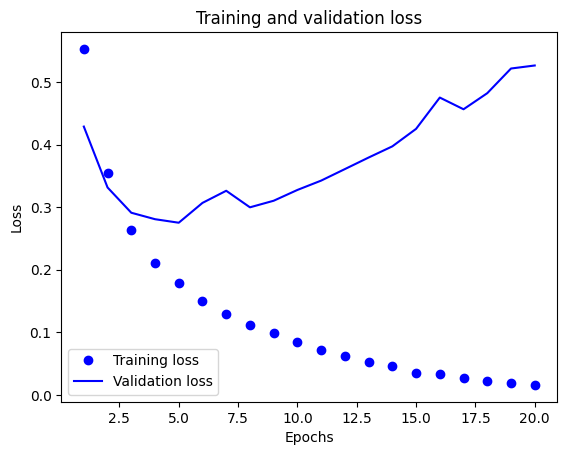

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

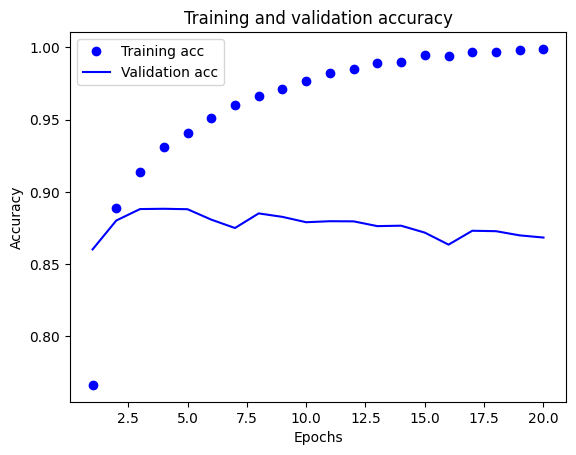

In [33]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [34]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4457 - accuracy: 0.8150
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2600 - accuracy: 0.9059
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2063 - accuracy: 0.9258
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3006 - accuracy: 0.8811


In [35]:
results

[0.3006359934806824, 0.8811200261116028]

### Using a trained model to generate predictions on new data

In [36]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.24760409],
       [0.99972486],
       [0.891062  ],
       ...,
       [0.1343042 ],
       [0.07047924],
       [0.6068304 ]], dtype=float32)

### Further experiments

In [37]:
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1657 - accuracy: 0.7829 - val_loss: 0.1198 - val_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1012 - accuracy: 0.8881 - val_loss: 0.0978 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0790 - accuracy: 0.9097 - val_loss: 0.0894 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0691 - accuracy: 0.9203 - val_loss: 0.0887 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0593 - accuracy: 0.9319 - val_loss: 0.0869 - val_accuracy: 0.8819
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0524 - accuracy: 0.9421 - val_loss: 0.0905 - val_accuracy: 0.8767
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0474 - accuracy: 0.9469 - val_loss: 0.0847 - val_accuracy: 0.8863
Epoch 8/20
30

In [38]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 4s 67ms/step - loss: 0.1937 - accuracy: 0.7164 - val_loss: 0.1436 - val_accuracy: 0.8122
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1061 - accuracy: 0.8735 - val_loss: 0.0973 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0777 - accuracy: 0.9043 - val_loss: 0.0957 - val_accuracy: 0.8700
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0614 - accuracy: 0.9272 - val_loss: 0.1035 - val_accuracy: 0.8610
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0541 - accuracy: 0.9345 - val_loss: 0.0869 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0459 - accuracy: 0.9457 - val_loss: 0.0937 - val_accuracy: 0.8753
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0393 - accuracy: 0.9541 - val_loss: 0.0931 - val_accuracy: 0.8746
Epoch 8/20
30

In [39]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.5198 - accuracy: 0.7589 - val_loss: 0.3684 - val_accuracy: 0.8691
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3034 - accuracy: 0.8943 - val_loss: 0.3108 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2272 - accuracy: 0.9175 - val_loss: 0.2837 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1838 - accuracy: 0.9355 - val_loss: 0.2756 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1553 - accuracy: 0.9465 - val_loss: 0.2975 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1330 - accuracy: 0.9539 - val_loss: 0.3116 - val_accuracy: 0.8763
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1121 - accuracy: 0.9646 - val_loss: 0.3487 - val_accuracy: 0.8690
Epoch 8/20
30

### Wrapping up

Here’s what you should take away from this example:
* You usually need to do quite a bit of preprocessing on your raw data in order to
be able to feed it—as tensors—into a neural network. Sequences of words can
be encoded as binary vectors, but there are other encoding options too.
* Stacks of Dense layers with relu activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.
* In a binary classification problem (two output classes), your model should end
with a Dense layer with one unit and a sigmoid activation: the output of your
model should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is binary_crossentropy.
* The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never
seen before. Be sure to always monitor performance on data that is outside of
the training set.

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [40]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [41]:
len(train_data)

8982

In [42]:
len(test_data)

2246

In [43]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [52]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [54]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [55]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [57]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [61]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [62]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [63]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [64]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [65]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: 2.7415 - accuracy: 0.4753 - val_loss: 1.8626 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.5761 - accuracy: 0.6700 - val_loss: 1.4099 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.2059 - accuracy: 0.7400 - val_loss: 1.1964 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.9887 - accuracy: 0.7869 - val_loss: 1.0718 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8187 - accuracy: 0.8255 - val_loss: 1.0027 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6852 - accuracy: 0.8534 - val_loss: 0.9505 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 73ms/step - loss: 0.5767 - accuracy: 0.8794 - val_loss: 0.9122 - val_accuracy: 0.8100
Epoch 8/20
16

**Plotting the training and validation loss**

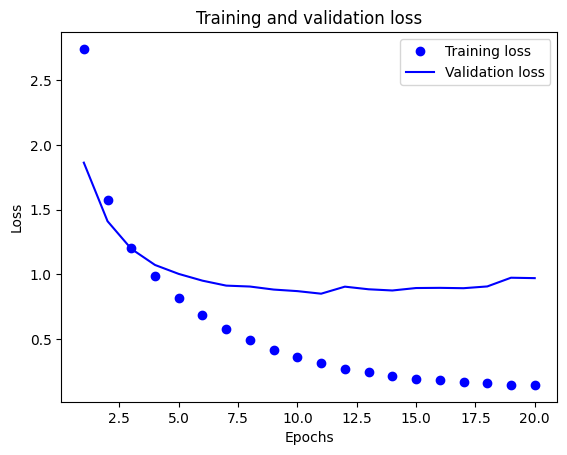

In [66]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

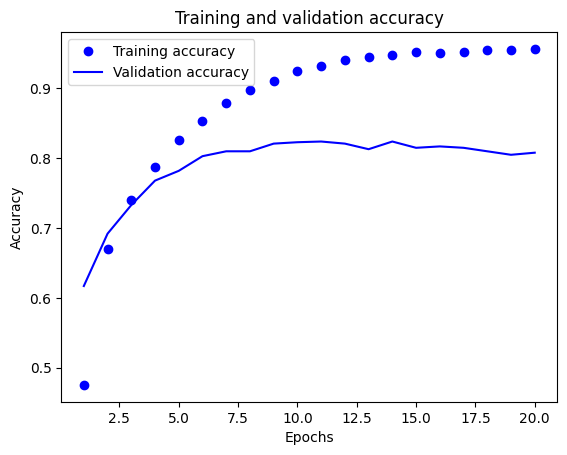

In [67]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [68]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 47ms/step - loss: 2.6163 - accuracy: 0.5161
Epoch 2/9
18/18 [==============================] - 1s 48ms/step - loss: 1.4652 - accuracy: 0.6846
Epoch 3/9
18/18 [==============================] - 1s 47ms/step - loss: 1.1213 - accuracy: 0.7606
Epoch 4/9
18/18 [==============================] - 1s 47ms/step - loss: 0.9068 - accuracy: 0.8076
Epoch 5/9
18/18 [==============================] - 1s 47ms/step - loss: 0.7516 - accuracy: 0.8348
Epoch 6/9
18/18 [==============================] - 1s 47ms/step - loss: 0.6146 - accuracy: 0.8658
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.5092 - accuracy: 0.8927
Epoch 8/9
18/18 [==============================] - 1s 79ms/step - loss: 0.4282 - accuracy: 0.9104
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9085 - accuracy: 0.7921


In [69]:
results

[0.9085459113121033, 0.7920747995376587]

In [70]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19145146927871773

### Generating predictions on new data

In [71]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [72]:
predictions[0].shape

(46,)

In [73]:
np.sum(predictions[0])

0.9999999

In [74]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [75]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [76]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [77]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.9555 - accuracy: 0.3133 - val_loss: 2.3056 - val_accuracy: 0.3590
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 2.0004 - accuracy: 0.4318 - val_loss: 1.7760 - val_accuracy: 0.5590
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.5758 - accuracy: 0.6031 - val_loss: 1.5202 - val_accuracy: 0.6310
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3100 - accuracy: 0.6774 - val_loss: 1.3951 - val_accuracy: 0.6750
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.1490 - accuracy: 0.7141 - val_loss: 1.3411 - val_accuracy: 0.6850
Epoch 6/20
63/63 [==============================] - 2s 27ms/step - loss: 1.0379 - accuracy: 0.7323 - val_loss: 1.2989 - val_accuracy: 0.6910
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9503 - accuracy: 0.7547 - val_loss: 1.3099 - val_accuracy: 0.6920
Epoch 8/20
63

### Further experiments

In [78]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 34ms/step - loss: 1.6211 - accuracy: 0.6606 - val_loss: 1.1207 - val_accuracy: 0.7490
Epoch 2/20
63/63 [==============================] - 2s 27ms/step - loss: 0.8033 - accuracy: 0.8256 - val_loss: 0.9442 - val_accuracy: 0.7930
Epoch 3/20
63/63 [==============================] - 2s 26ms/step - loss: 0.4924 - accuracy: 0.8950 - val_loss: 0.8535 - val_accuracy: 0.8130
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 0.3298 - accuracy: 0.9291 - val_loss: 0.8579 - val_accuracy: 0.8110
Epoch 5/20
63/63 [==============================] - 2s 27ms/step - loss: 0.2466 - accuracy: 0.9420 - val_loss: 0.8684 - val_accuracy: 0.8230
Epoch 6/20
63/63 [==============================] - 2s 30ms/step - loss: 0.2106 - accuracy: 0.9463 - val_loss: 0.9468 - val_accuracy: 0.7990
Epoch 7/20
63/63 [==============================] - 3s 41ms/step - loss: 0.1843 - accuracy: 0.9511 - val_loss: 0.9667 - val_accuracy: 0.8060
Epoch 8/20
63

In [79]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 56ms/step - loss: 1.6293 - accuracy: 0.6637 - val_loss: 1.1377 - val_accuracy: 0.7600
Epoch 2/20
63/63 [==============================] - 2s 27ms/step - loss: 0.7960 - accuracy: 0.8327 - val_loss: 0.8857 - val_accuracy: 0.8170
Epoch 3/20
63/63 [==============================] - 3s 44ms/step - loss: 0.5090 - accuracy: 0.8964 - val_loss: 0.8213 - val_accuracy: 0.8300
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 0.3520 - accuracy: 0.9261 - val_loss: 0.7887 - val_accuracy: 0.8300
Epoch 5/20
63/63 [==============================] - 2s 26ms/step - loss: 0.2667 - accuracy: 0.9404 - val_loss: 0.8204 - val_accuracy: 0.8300
Epoch 6/20
63/63 [==============================] - 2s 28ms/step - loss: 0.2176 - accuracy: 0.9470 - val_loss: 0.8098 - val_accuracy: 0.8300
Epoch 7/20
63/63 [==============================] - 2s 26ms/step - loss: 0.1890 - accuracy: 0.9524 - val_loss: 0.8266 - val_accuracy: 0.8270
Epoch 8/20
63

### Wrapping up

Here’s what you should take away from this example:
* If you’re trying to classify data points among _N_ classes, your model should end
with a _Dense_ layer of size _N_.
* In a single-label, multiclass classification problem, your model should end with
a _softmax_ activation so that it will output a probability distribution over the _N_
output classes.
* Categorical crossentropy is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions
output by the model and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
  * Encoding the labels via categorical encoding (also known as one-hot encoding) and using _categorical_crossentropy_ as a loss function
  * Encoding the labels as integers and using the _sparse_categorical_crossentropy_ loss function
* If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your model due to intermediate layers that
are too small.

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [80]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [81]:
train_data.shape

(404, 13)

In [82]:
test_data.shape

(102, 13)

In [83]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [84]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [97]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [98]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [100]:
all_scores

[2.055704355239868, 2.3975141048431396, 2.5567467212677, 2.364948034286499]

In [101]:
np.mean(all_scores)

2.3437283039093018

**Saving the validation logs at each fold**

In [102]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [103]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

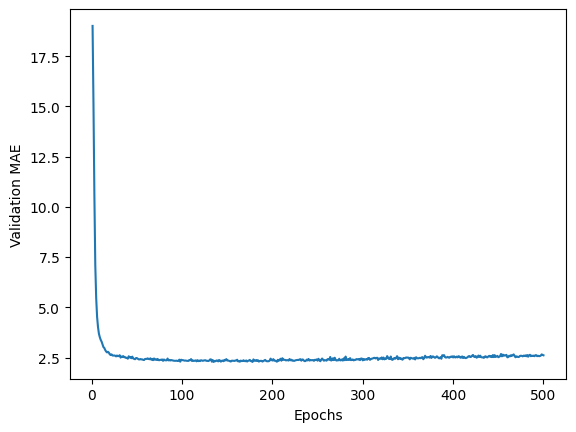

In [104]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

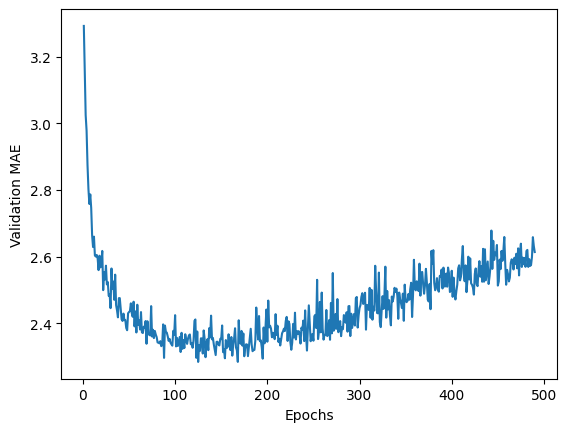

In [106]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [107]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.4656 - mae: 2.7648


In [108]:
test_mae_score

2.764758825302124

### Generating predictions on new data

In [109]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 4ms/step


array([7.3554378], dtype=float32)

### Wrapping up

Here’s what you should take away from this scalar regression example:
* Regression is done using different loss functions than we used for classification.
Mean squared error (MSE) is a loss function commonly used for regression.
* Similarly, evaluation metrics to be used for regression differ from those used for
classification; naturally, the concept of accuracy doesn’t apply for regression. A
common regression metric is mean absolute error (MAE).
* When features in the input data have values in different ranges, each feature
should be scaled independently as a preprocessing step.
* When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
* When little training data is available, it’s preferable to use a small model with few
intermediate layers (typically only one or two), in order to avoid severe overfitting.

## Summary

* The three most common kinds of machine learning tasks on vector data are
binary classification, multiclass classification, and scalar regression.
    * The “Wrapping up” sections earlier in the chapter summarize the important
    points you’ve learned regarding each task.
    * Regression uses different loss functions and different evaluation metrics
    than classification.
* You’ll usually need to preprocess raw data before feeding it into a neural network.
* When your data has features with different ranges, scale each feature independently as part of preprocessing.
* As training progresses, neural networks eventually begin to overfit and obtain
worse results on never-before-seen data.
* If you don’t have much training data, use a small model with only one or two
intermediate layers, to avoid severe overfitting.
* If your data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small.
* When you’re working with little data, K-fold validation can help reliably evaluate your model.